In [2]:
import pandas as pd
import numpy as np
import os
import cv2


In [3]:
dir='/content/drive/MyDrive/deep learning/training_set'

In [6]:
categories=os.listdir(dir)

In [7]:
features=[]
for i in categories:
    path=os.path.join(dir,i)
    num_classes=categories.index(i)
    for img in os.listdir(path):
        if img.endswith('.jpg'):
            
            img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_COLOR)
            img_array=cv2.resize(img_array,(150,150))
            features.append([img_array,num_classes])


In [8]:
x=[]
y=[]
for i,j in features:
    x.append(i)
    y.append(j)

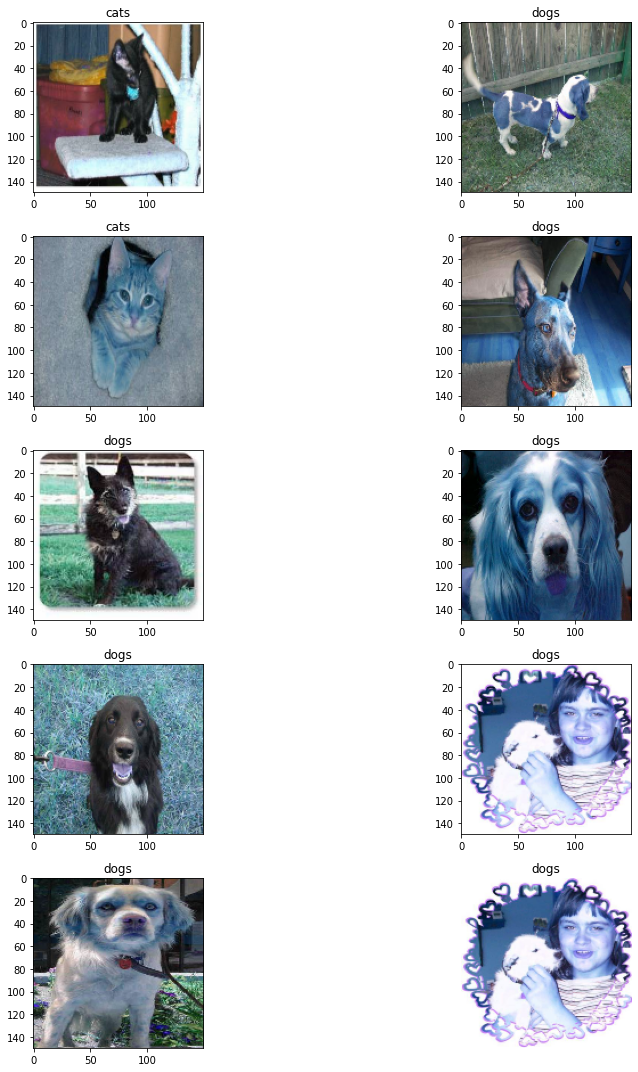

In [9]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots(5,2)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range (2):
        l=np.random.randint(0,len(y))
        ax[i,j].imshow(x[l])
        ax[i,j].set_title(categories[y[l]])
plt.axis('off')        
plt.tight_layout()

In [10]:
x=np.array(x).reshape(-1,150,150,3)/255.0

In [11]:
from tensorflow.keras.utils import to_categorical
y=to_categorical(y)

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=12)

In [13]:
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.utils import to_categorical

# specifically for cnn
from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
 
import tensorflow as tf

In [16]:
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(150,150,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(2, 2, padding="same"))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(2, 2, padding="same"))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(2, 2, padding="same"))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(2, activation="softmax"))

In [17]:
model.compile(optimizer='Adam',metrics=['accuracy'],loss='binary_crossentropy')

In [18]:
history=model.fit(x_train,y_train,epochs=50)

Epoch 1/50
156/156 [==============================] - 39s 34ms/step - loss: 0.7419 - accuracy: 0.6163
Epoch 2/50
156/156 [==============================] - 5s 33ms/step - loss: 0.6432 - accuracy: 0.6312
Epoch 3/50
156/156 [==============================] - 5s 33ms/step - loss: 0.6163 - accuracy: 0.6601
Epoch 4/50
156/156 [==============================] - 5s 33ms/step - loss: 0.5640 - accuracy: 0.7069
Epoch 5/50
156/156 [==============================] - 5s 33ms/step - loss: 0.5383 - accuracy: 0.7164
Epoch 6/50
156/156 [==============================] - 5s 33ms/step - loss: 0.4755 - accuracy: 0.7745
Epoch 7/50
156/156 [==============================] - 5s 33ms/step - loss: 0.4193 - accuracy: 0.8022
Epoch 8/50
156/156 [==============================] - 5s 33ms/step - loss: 0.3626 - accuracy: 0.8323
Epoch 9/50
156/156 [==============================] - 5s 33ms/step - loss: 0.2619 - accuracy: 0.8835
Epoch 10/50
156/156 [==============================] - 5s 33ms/step - loss: 0.1844 - accur

In [23]:
loss,accuracy=model.evaluate(x_test,y_test)

40/40 [==============================] - 0s 11ms/step - loss: 1.4839 - accuracy: 0.7398


In [15]:
mnet = tf.keras.applications.mobilenet_v2.MobileNetV2(include_top=False, 
                                                      input_shape=(150, 150, 3),#same as of custom model
                                                      pooling='avg',
                                                      weights='imagenet')

mnet.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 75, 75, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 75, 75, 32)   128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 75, 75, 32)   0           bn_Conv1[0][0]                   
_______________________________________________________________________________

In [17]:
model2=Sequential([
    mnet,
    Dropout(0.25),
    Dense(2,activation='softmax') # here we use 10 layers because we have to predict bewtween 10 classes
])

In [19]:
model2.layers[0].trainable = False
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [20]:
history2=model2.fit(x_train,y_train,batch_size=12, epochs=30)

Epoch 1/30
416/416 [==============================] - 39s 10ms/step - loss: 0.3134 - acc: 0.8841
Epoch 2/30
416/416 [==============================] - 4s 10ms/step - loss: 0.1505 - acc: 0.9476
Epoch 3/30
416/416 [==============================] - 4s 10ms/step - loss: 0.1344 - acc: 0.9511
Epoch 4/30
416/416 [==============================] - 4s 10ms/step - loss: 0.1213 - acc: 0.9573
Epoch 5/30
416/416 [==============================] - 4s 10ms/step - loss: 0.1117 - acc: 0.9570
Epoch 6/30
416/416 [==============================] - 4s 10ms/step - loss: 0.1136 - acc: 0.9613
Epoch 7/30
416/416 [==============================] - 4s 10ms/step - loss: 0.1155 - acc: 0.9565
Epoch 8/30
416/416 [==============================] - 4s 10ms/step - loss: 0.1078 - acc: 0.9614
Epoch 9/30
416/416 [==============================] - 4s 10ms/step - loss: 0.1015 - acc: 0.9631
Epoch 10/30
416/416 [==============================] - 4s 10ms/step - loss: 0.0773 - acc: 0.9736
Epoch 11/30
416/416 [=================

In [21]:
loss,accuracy=model2.evaluate(x_test,y_test)

40/40 [==============================] - 2s 28ms/step - loss: 0.1674 - acc: 0.9512


In [29]:
from keras.models import load_model
import tensorflow as tf



converter = tf.lite.TFLiteConverter.from_keras_model(model2)
tflite_model = converter.convert()

print("model converted")

# Save the model.
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmpcwhvnxan/assets
model converted
